In [1]:
length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
    33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
    39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 
    600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
    920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

label = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fish_data = [[l, w] for l, w in zip(length, weight)]

In [2]:
import numpy as np

In [3]:
input_arr=np.array(fish_data)
target_arr=np.array(label)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(
    input_arr, target_arr, train_size=0.8, random_state=42
)

In [6]:
print(train_input.shape,train_target.shape)

(39, 2) (39,)


In [7]:
print(test_input.shape, test_target.shape)

(10, 2) (10,)


In [8]:
train_input[:5, :]

array([[ 31.5, 500. ],
       [ 29. , 430. ],
       [ 41. , 950. ],
       [ 30. , 450. ],
       [ 29. , 363. ]])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_input, train_target)
print(knn.score(test_input, test_target))  # validation == test

1.0


In [10]:
print(knn.predict([[25,150]]))

[0]


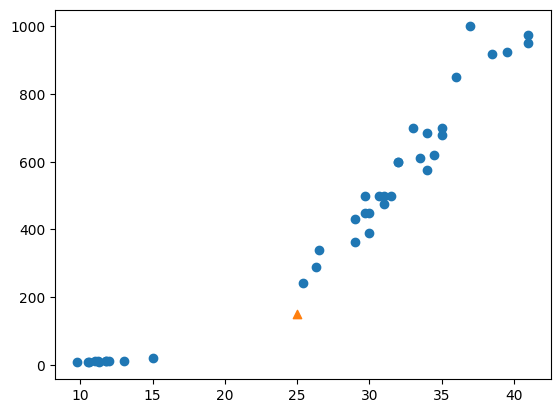

In [17]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.show()

In [18]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)

[ 26.76410256 434.13333333] [ 10.12221439 320.45298734]


In [12]:
train_scaled=(train_input-mean)/std
# mean=np.mean(train_scaled,axis=0)
# std=np.std(train_scaled,axis=0)
# print(mean,std)


In [13]:
knn.fit(train_scaled,train_target)
print(knn.score(test_input,test_target)) #잘못된 결과!

test_scaled=(test_input-mean)/std
print(knn.score(test_scaled,test_target)) 

0.7
1.0


In [14]:
predict_data=(np.array([25,150])-mean)/std
print(knn.predict([predict_data]))

[1]
